# ADM HW4-HaRd CoDiNg

## Group 28:
### Diletta Abbonato, Lorenzo Loretucci, Inar Azimov

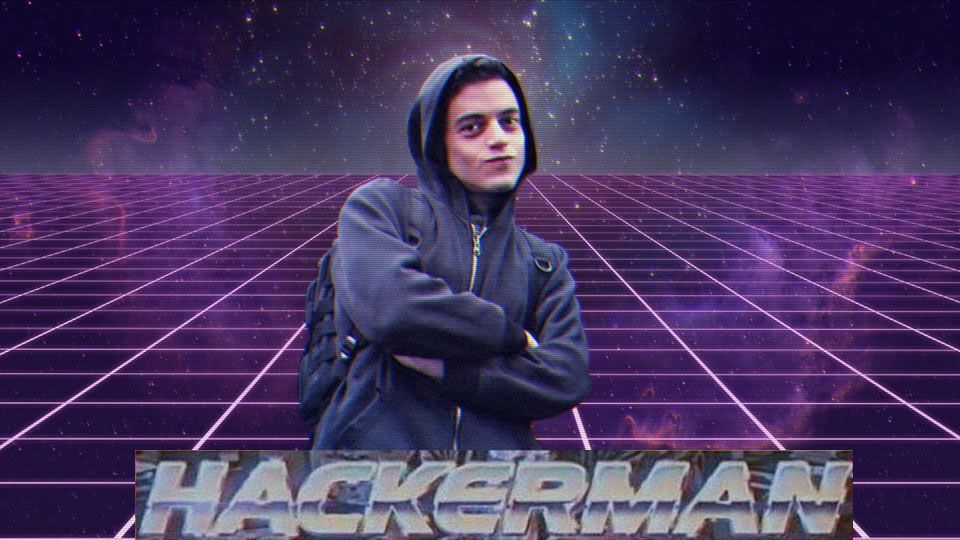

In [2]:
import kmeans #our k means -> repository .py file
import math
from random import *
import time
from tqdm import tqdm_notebook #library which show the progess bar for a loop 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rd
from scipy import stats
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from IPython.display import Image
from scipy import stats
from sklearn.decomposition import PCA #Used for Principal components Analysis
import csv
from scipy.spatial import distance
from copy import deepcopy
from statistics import mean


## 1. Hashing task!


### As a first step we decided the **probability of false positives**, $p= 0.01$  and starting from the length of the passwords1 file we calculated the size of the *Bloom filter array* and determined the number of *hash functions* to be used.

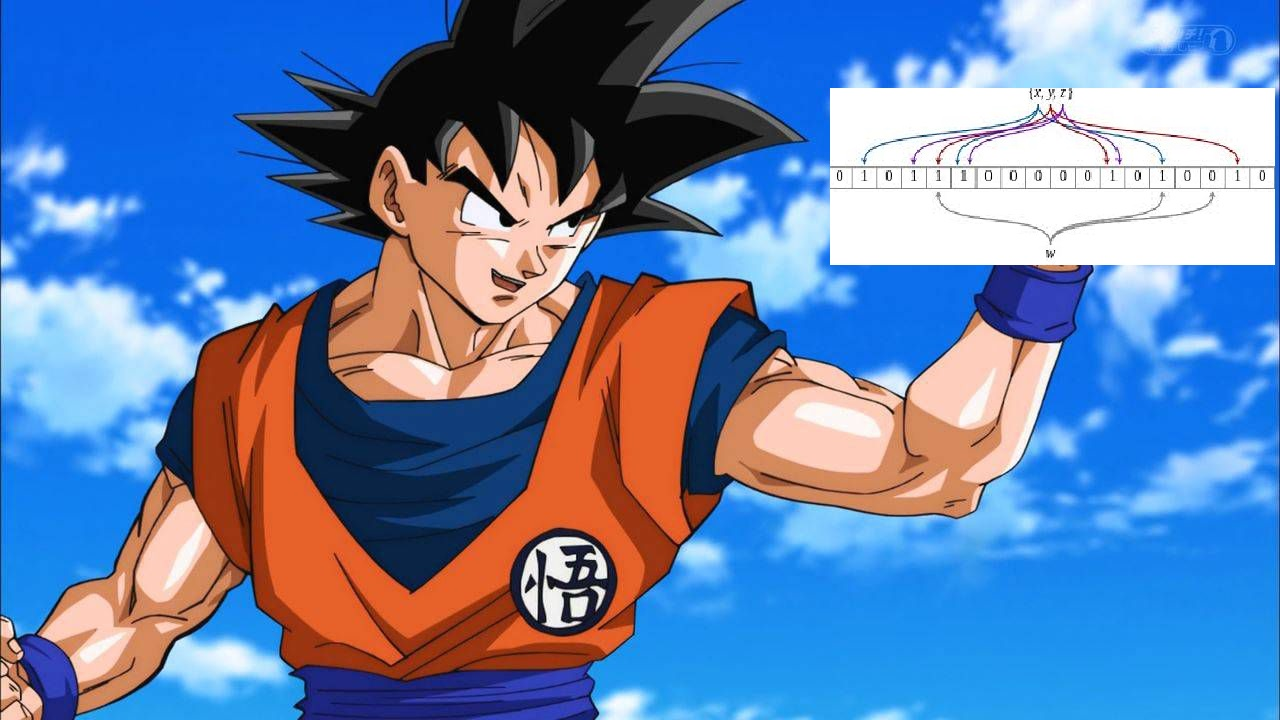

In [3]:
n=100000000 #len(psw1)
p=0.01 #probability of false positive
m = -(n * math.log(p))/(math.log(2)**2) #size of bloomearray
k = (m/n) * math.log(2) #number of hash function
bloomfilter=[False for i in range(int(m))]#create bloom filter
len_b=len(bloomfilter) #len of bloom filter



### We implemented different *hash functions* through the use of the function *ord* and then we created the *Bloom filter*.

#### p.s. Each hash function was built with **♥** 

In [5]:
#here we define hash functions
def hash_1(string, bloomfiltersize):
    trunks = 0
    for pos in range(len(string)):
        trunks *= ord(string[pos])
    return int(trunks%bloomfiltersize)

def hash_2(string, bloomfiltersize):
    myssketa = 1
    for i in range(len(string)):   
        myssketa = myssketa+ord(string[i])**3<<2
    return int(myssketa % bloomfiltersize)


def hash_3(string, bloomfiltersize):
    santuzzo=1
    for i in range(len(string)):
        santuzzo+=santuzzo-ord(string[i])*2<<2
    return int(santuzzo % bloomfiltersize)

def hash_4(string, bloomfiltersize):
    majinbuu=1
    for i in range(len(string)):
        majinbuu+=majinbuu*ord(string[i])<<3
    return int(majinbuu% bloomfiltersize)

def hash_5(string,bloomfiltersize):
    VegetaSuperSayan=1
    for i in range(len(string)):
        VegetaSuperSayan+=VegetaSuperSayan*ord(string[i])**3
    return int(VegetaSuperSayan%bloomfiltersize)

def hash_6(string,bloomfiltersize):
    MioCugginoHaGokuDi8livello=0
    for i in range(len(string)):
        
        MioCugginoHaGokuDi8livello+=MioCugginoHaGokuDi8livello+ord(string[i])*8
    return int(MioCugginoHaGokuDi8livello%bloomfiltersize)



In [6]:
path1='passwords1.txt'
path2='passwords2.txt'

### Bloom filter method is based on two steps:
* **Step 1** = The *passwords1* file is converted by *hash function* in positions are initialized on the *Bloom filter* array with True.
* **Step 2** = Like for Step 1 *passwords2* file is converted and compared to the already filled positions of the bloom filter in order to check the number of duplicates.

In [1]:
def bloomfiltermethod(path1,path2):
    start=time.time()
    openfile=open(path1,'r')#open passwords1 file 
    for l in tqdm_notebook(openfile,desc='Add Element',leave=False): 
        string=l.strip() #take as input password inside the file
        #apply hash function defined above to insert the value inside the bloomfilter, filled with True(1)
        bloomfilter[hash_1(string,len_b)] = True
        bloomfilter[hash_2(string,len_b)] = True
        bloomfilter[hash_3(string,len_b)] = True
        bloomfilter[hash_4(string,len_b)] = True              
        bloomfilter[hash_5(string,len_b)] = True
        bloomfilter[hash_6(string,len_b)] = True
    openfile.close()



    openfile=open(path2,'r')#open passwords2 file
    count_dup = 0
    for l in tqdm_notebook(openfile, desc='Check Element', leave=False):
        string_p=l.strip()#take in input each password, apply hash function
        #check if any of bits is inside the filter using the same hash function
        digest_1=hash_1(string_p,len_b) 
        digest_2=hash_2(string_p,len_b)
        digest_3=hash_3(string_p,len_b)
        digest_4=hash_4(string_p,len_b)
        digest_5=hash_5(string_p,len_b)
        digest_6=hash_6(string_p,len_b)
        if bloomfilter[digest_1] == False or bloomfilter[digest_2] == False or bloomfilter[digest_3] == False or bloomfilter[digest_4] == False or bloomfilter[digest_5] == False or bloomfilter[digest_6] == False:

            continue
        else :
            count_dup += 1 #count the number of duplicate found during the check operation


    end=time.time()

    openfile.close()
    print('Number of hash function used: '+ str(int(k)))
    print('Number of duplicate found: '+ str(count_dup))
    print('Probability of false positive: '+ str(p))
    print('Execution time: ', end-start)



In [9]:
bloomfiltermethod(path1,path2) 

Number of hash function used: 6
Number of duplicate found: 14427978
Probability of false positive: 0.01
Execution time:  5234.5207896232605


**BLOOM FILTER Super Saiyan God Super Saiyan**

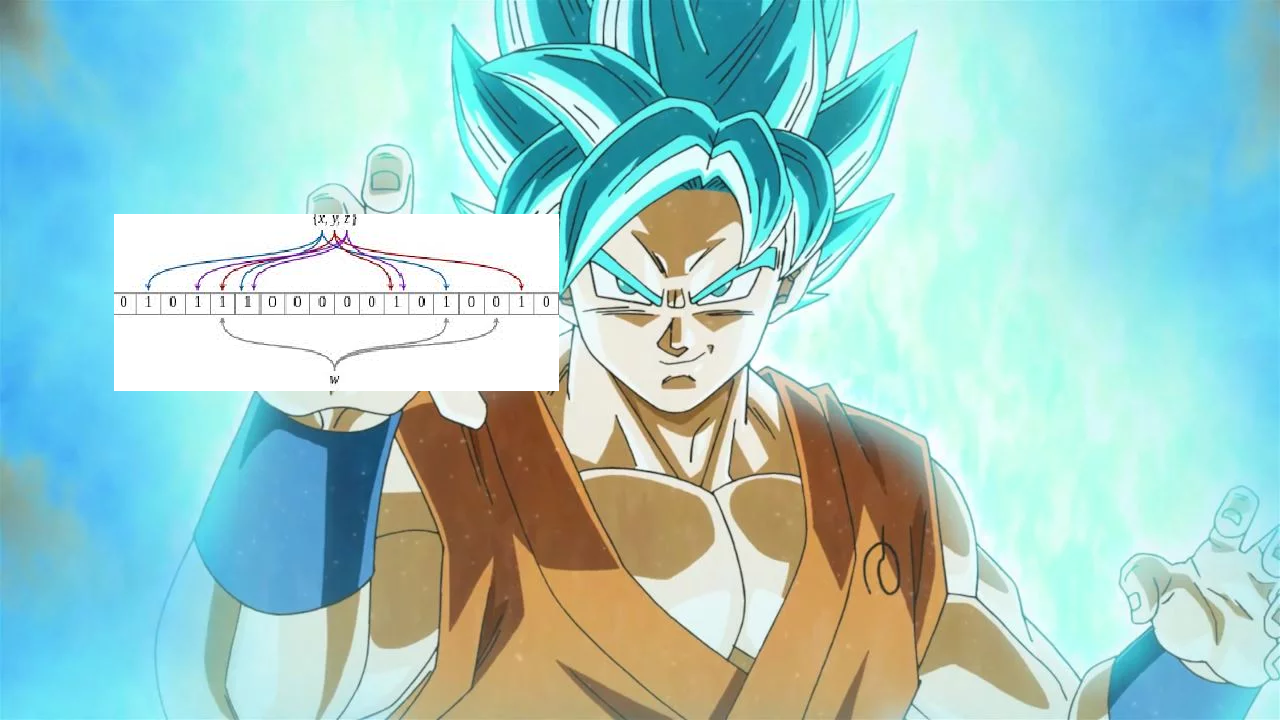

## 2. Alphabetical Sort

In [1]:
#ref link: https://www.hackerearth.com/practice/algorithms/sorting/counting-sort/tutorial/
def counting_sort(lst):
    if len(lst) < 2:
      return lst
    
    hash_map_lst = [0] * (max(lst) + 1)

    #create array with value as a index and frequency as a value
    for i in  lst:
        hash_map_lst[i] += 1
   
    sorted_lst = [0] * len(lst)
    
    #iterate through has_map_lst and pālace elements in the sorted array based on number of timems occurs
    j = 0
    for index,item in enumerate(hash_map_lst):
      while item > 0:
        sorted_lst[j] = index
        j +=1
        item -= 1
    
    return sorted_lst


def  alphabet_sort(lst):
    if len(lst) < 2:
      return lst

    #assign each letter a numberical value based on order in which the occur
    all_alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
    alpha_map = {}
    for index, item  in enumerate(all_alphabets):
        alpha_map[item] = index

    #get corresponding numerical value of the input list and use value as an index of of the numberical values
    temp_map_lst = {}
    num_lst = []
    for item in lst:
        temp_map_lst[alpha_map[item]] = item
        num_lst.append(alpha_map[item])

    #do numerical sorting using counting sort function
    sorted_num_lst = counting_sort(num_lst)

    #replace the numbers with corresponding letters
    sorted_lst = []
    for item in sorted_num_lst:
        sorted_lst.append(temp_map_lst[item])
    
    return sorted_lst


In [2]:
counting_sort([5,6, 5, 4, 3, 1,2])

[1, 2, 3, 4, 5, 5, 6]

In [3]:
alphabet_sort(["b", "c", "a", "a", "b"])

['a', 'a', 'b', 'b', 'c']

In [4]:
#word sorting 
def word_sort(lst):
  N = len(lst)
  first_index = 0
  second_index = 1

  while second_index < N:
    first_val = lst[first_index]
    second_val = lst[second_index]

    if greater(first_val, second_val):
      lst[first_index] = second_val
      lst[second_index] = first_val
    
    first_index +=1
    second_index +=1
 
  return lst

def greater(a, b):
  if a.lower() > b.lower():
    return True
  else: 
    return False

In [5]:
word_sort(["ashok","cgd", "ba" "arun", "baloon" "cgd"])

['ashok', 'baarun', 'balooncgd', 'cgd']

### COMPLEXITY

 * Counting sort function is taking O(n) time if lenght of the input list is more than 1.
 * Alpha sort function which takes O(n) (converted each letter into corresponding numerical value and applied the          counting sort algo to sort the number then remap each number with their repective letters ). 
 * Word sorting function which takes O (n^2) time in worst case scenario.

## 3 Find similar wines! 

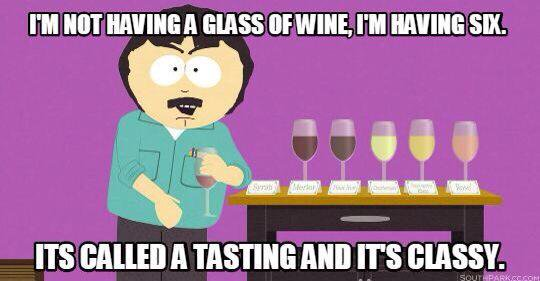

## Let's Start!

#### Visualize The Wine Data

In [163]:
data = pd.read_csv("wine(DATA).data", names=['Class', 
                                                   'Alcohol', 
                                                   'Malic acid',
                                                   'Ash',
                                                   'Alcalinity of ash' ,
                                                   'Magnesium', 
                                                   'Total phenols',
                                                   'Flavanoids' ,
                                                   'Nonflavanoidphenols', 
                                                   'Proanthocyanins',
                                                   'Color intensity',
                                                   'Hue',
                                                   'OD280/OD315 DW',
                                                   'Proline'])
data.head(5)


Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoidphenols  Proanthocyanins  \
0           2.80        3.06                 0.28             2.29   
1           2.65        2.76                 0.26             1.28   
2           2.80        3.24                 0.30             2.81   
3           3.85        3.49                 0.24             2.18   
4           2.80        2.69                 0.39             1.82   

   Color intensity   Hue  OD280/OD315 DW  Proline  
0             5.64  1.04            3.92     1065  
1             4.38  1.05            3.40     1050  
2             5.68  1.03            3.17     1185  
3             7.80  0.86            3.45     1480  
4             4.32  1.04            2.93      735

#### We checked if inside the dataframe there was some missing value

In [164]:
data.isnull().sum()

Class                  0
Alcohol                0
Malic acid             0
Ash                    0
Alcalinity of ash      0
Magnesium              0
Total phenols          0
Flavanoids             0
Nonflavanoidphenols    0
Proanthocyanins        0
Color intensity        0
Hue                    0
OD280/OD315 DW         0
Proline                0
dtype: int64

#### No missing value! Lucky day

#### For analysing, let's see how data are distribuited:

In [165]:
data.describe().transpose()

count        mean         std     min       25%      50%  \
Class                178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol              178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic acid           178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash                  178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity of ash    178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium            178.0   99.741573   14.282484   70.00   88.0000   98.000   
Total phenols        178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids           178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoidphenols  178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins      178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color intensity      178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue                  178.0    0.957449    0.228572    0.48    0.7825    0.965   
OD280/OD315 DW       178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline              178.0  746.893258  314.907474  278.00  500.5000  673.500   

                          75%      max  
Class                  3.0000     3.00  
Alcohol               13.6775    14.83  
Malic acid             3.0825     5.80  
Ash                    2.5575     3.23  
Alcalinity of ash     21.5000    30.00  
Magnesium            107.0000   162.00  
Total phenols          2.8000     3.88  
Flavanoids             2.8750     5.08  
Nonflavanoidphenols    0.4375     0.66  
Proanthocyanins        1.9500     3.58  
Color intensity        6.2000    13.00  
Hue                    1.1200     1.71  
OD280/OD315 DW         3.1700     4.00  
Proline              985.0000  1680.00

In [166]:
print('Number of columns and rows -->',data.shape)

Number of columns and rows --> (178, 14)


#### Below we define a correlation matrix to do some data exploration and discover which variables are more correlated each other
#### **P.s**: Of course we exclued the type of wine --> "Class" 


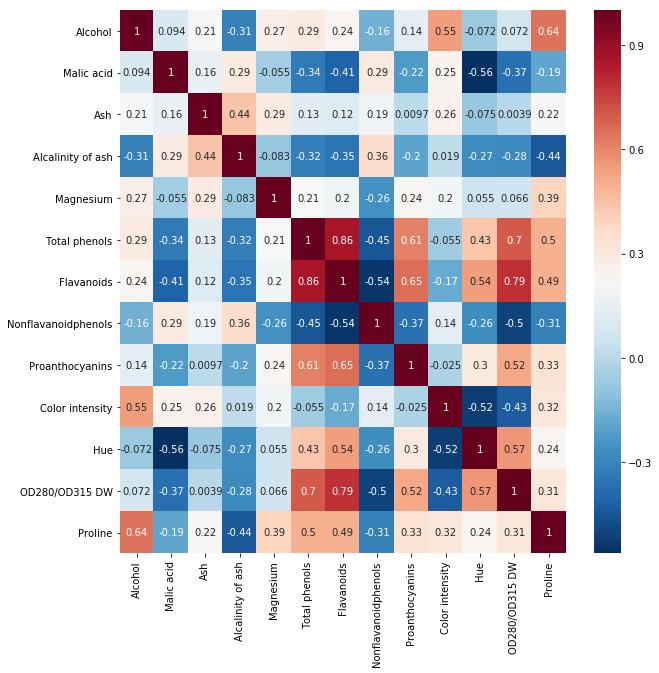

In [167]:
wine_correlation = data.iloc[:, 1:].corr()
plt.figure(figsize=(10,10))
sns.heatmap(wine_correlation, annot=True, cmap ="RdBu_r");

### Nice visualization right?

#### Let's Visualize the most 2 correlated variables:

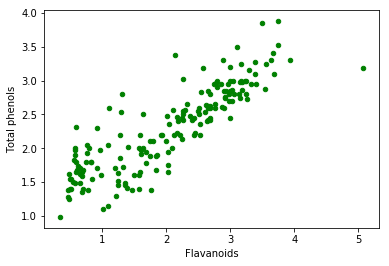

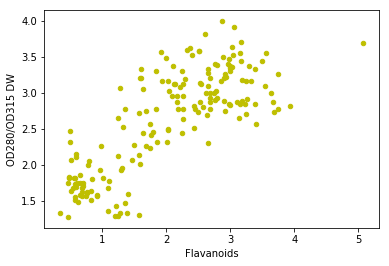

In [168]:
data.plot(kind= 'scatter', x= 'Flavanoids', y='Total phenols', c= 'g')
data.plot(kind= 'scatter', x= 'Flavanoids', y='OD280/OD315 DW', c= 'y')
plt.show()

#### There are some outliers in our data. Values which are far off from other data points and which do not fit in our data could hinder our accuracy.
#### Below we delete the outliers by calculating **z-score**. Z score normalizes our data. Here we get absolute value of **z-score** that is in the range of -3 to 3. 


In [169]:
def normalize(df):
    result=df.copy()
    for feature_name in df.columns:
        max_value=df[feature_name].max()
        min_value=df[feature_name].min()
        result[feature_name]=(df[feature_name]-min_value)/(max_value-min_value)
    return result

data_n=normalize(data.iloc[:,1:])

In [9]:
print('Number of columns and rows -->', data_n.shape)

Number of columns and rows --> (178, 13)


In [10]:
data_n['Class']=data['Class']
df_n=data_n[(np.abs(stats.zscore(data_n))<3).all(axis=1)] #apply the z-score 

In [11]:
print('New normalized columns and rows -->',df_n.shape)

New normalized columns and rows --> (168, 14)


In [12]:
df_n.reset_index(drop=True, inplace=True)
df_n.head(5) #final dataset 

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   Total phenols  Flavanoids  Nonflavanoidphenols  Proanthocyanins  \
0       0.627586    0.573840             0.283019         0.593060   
1       0.575862    0.510549             0.245283         0.274448   
2       0.627586    0.611814             0.320755         0.757098   
3       0.989655    0.664557             0.207547         0.558360   
4       0.627586    0.495781             0.490566         0.444795   

   Color intensity       Hue  OD280/OD315 DW   Proline  Class  
0         0.372014  0.455285        0.970696  0.561341      1  
1         0.264505  0.463415        0.780220  0.550642      1  
2         0.375427  0.447154        0.695971  0.646933      1  
3         0.556314  0.308943        0.798535  0.857347      1  
4         0.259386  0.455285        0.608059  0.325963      1

### Use the PCA (Principal Components Analysis) for a better visualization. #2Drulez

In [170]:
features= ['Alcohol', 
                     'Malic acid',
                     'Ash',
                     'Alcalinity of ash' ,
                     'Magnesium', 
                     'Total phenols',
                     'Flavanoids' ,
                     'Nonflavanoidphenols', 
                     'Proanthocyanins',
                     'Color intensity',
                     'Hue',
                     'OD280/OD315 DW',
                     'Proline']

x = df_n.loc[:, features].values

In [171]:
pca = PCA(n_components=2) #apply the PCA
principalComponents = pca.fit_transform(x) 
principDF = pd.DataFrame(data= principalComponents,  columns = ['pc1', 'pc2'])
final = pd.concat([principDF, df_n[['Class']]], axis = 1)

### Plot the PCA analysis
#### Thanks to PCA we have a clear first image of the distribution related to the 'Class' feature as is shown below

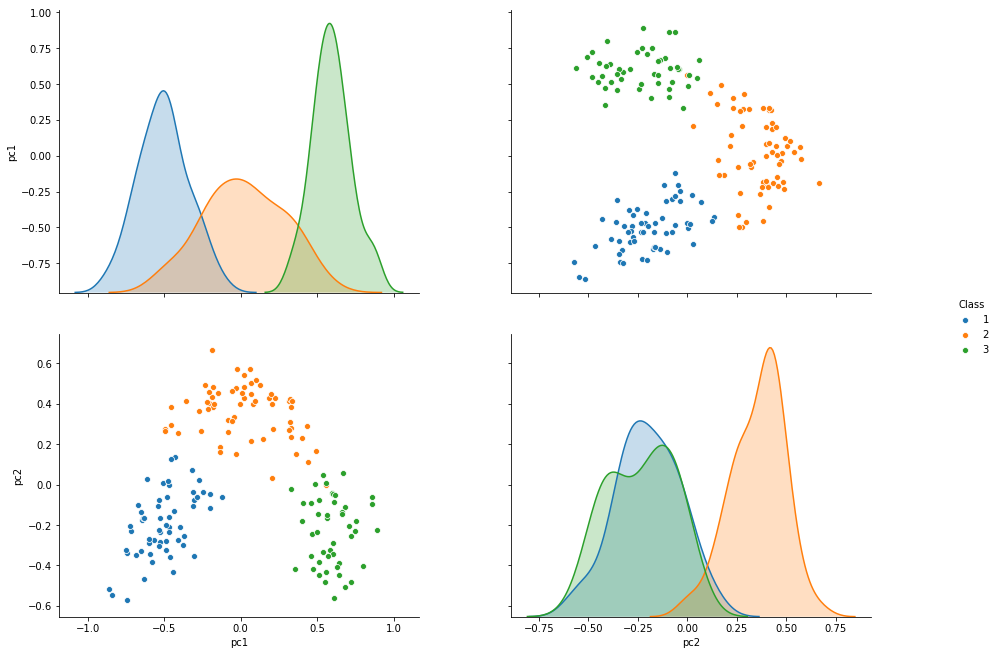

In [177]:
pca=sns.pairplot(vars = ["pc1", "pc2"] , data = final, hue = 'Class')
pca.fig.set_size_inches(15,10)
plt.show()

### From the representation above we decide to implement *K*-means with $k=3$

# *K*-Means!

### Let's start with the first steps to apply the algorithm.

In [17]:
X = principalComponents #numpyarray

In [178]:
df=df_n.drop(['Class'], axis=1) #drop class from the normalized data

### Now it's time to use the *Kmeans.py* personal library (You can find our personal py file in the repository)

In [75]:
# Perform k-means clustering
centroids, cluster_assignments, iterations, orig_centroids = kmeans.cluster(X, 3)

### Then we add to pca 'X' dataset the column labello wich has inside the belong class of each unity

In [103]:
labello=cluster_assignments[:,0]
labello=np.array(labello).flatten()
labello=labello.astype(int)
X = np.column_stack((X, labello))

#### Below we created a dataframe to make more simple the visualization with the use of scatterplot

In [ ]:
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'labello':X[:,2]})
df['labello']=df['labello'].astype(int)

Number of iterations --> 6


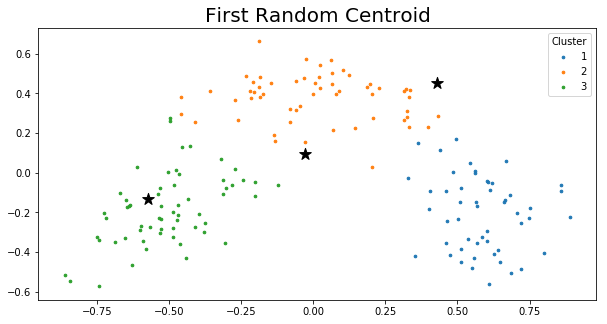


Original centroids position:
 [[ 0.42973696  0.45032134]
 [-0.02800998  0.09483655]
 [-0.57274386 -0.13435608]]


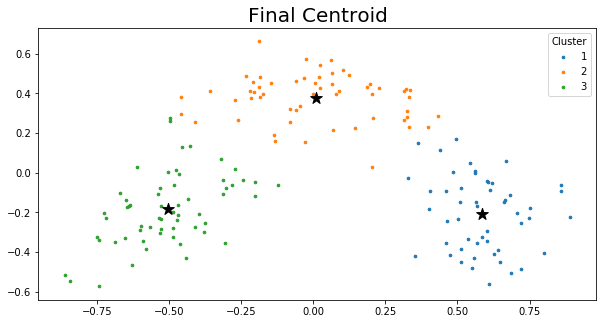


Final centroids position:
 [[ 0.58527446 -0.20623524]
 [ 0.0084926   0.37711767]
 [-0.50555127 -0.18296183]]


In [151]:
print ('Number of iterations -->', iterations)

plt.figure(figsize=(10,5))
plt.scatter(df[df['labello']==0]['X1'], df[df['labello']==0]['X2'], s=7, label='1')
plt.scatter(df[df['labello']==1]['X1'], df[df['labello']==1]['X2'], s=7, label='2')
plt.scatter(df[df['labello']==2]['X1'], df[df['labello']==2]['X2'], s=7, label='3')
plt.scatter([orig_centroids[:,0]], [orig_centroids[:,1]], marker='*', c=['black'], s=150)
plt.legend(title='Cluster')
plt.title('First Random Centroid', size=20)
plt.show()
print ('\nOriginal centroids position:\n', orig_centroids)

plt.figure(figsize=(10,5))
plt.scatter(df[df['labello']==0]['X1'], df[df['labello']==0]['X2'], s=7, label='1')
plt.scatter(df[df['labello']==1]['X1'], df[df['labello']==1]['X2'], s=7, label='2')
plt.scatter(df[df['labello']==2]['X1'], df[df['labello']==2]['X2'], s=7, label='3')
plt.scatter([centroids[:,0]], [centroids[:,1]], marker='*', c='black', s=150)
plt.title('Final Centroid', size=20)
plt.legend(title='Cluster')
plt.show()
print ('\nFinal centroids position:\n', centroids)

### Below we plot pairwise relationships in a dataset to evidence for each variable how there are clusterize 

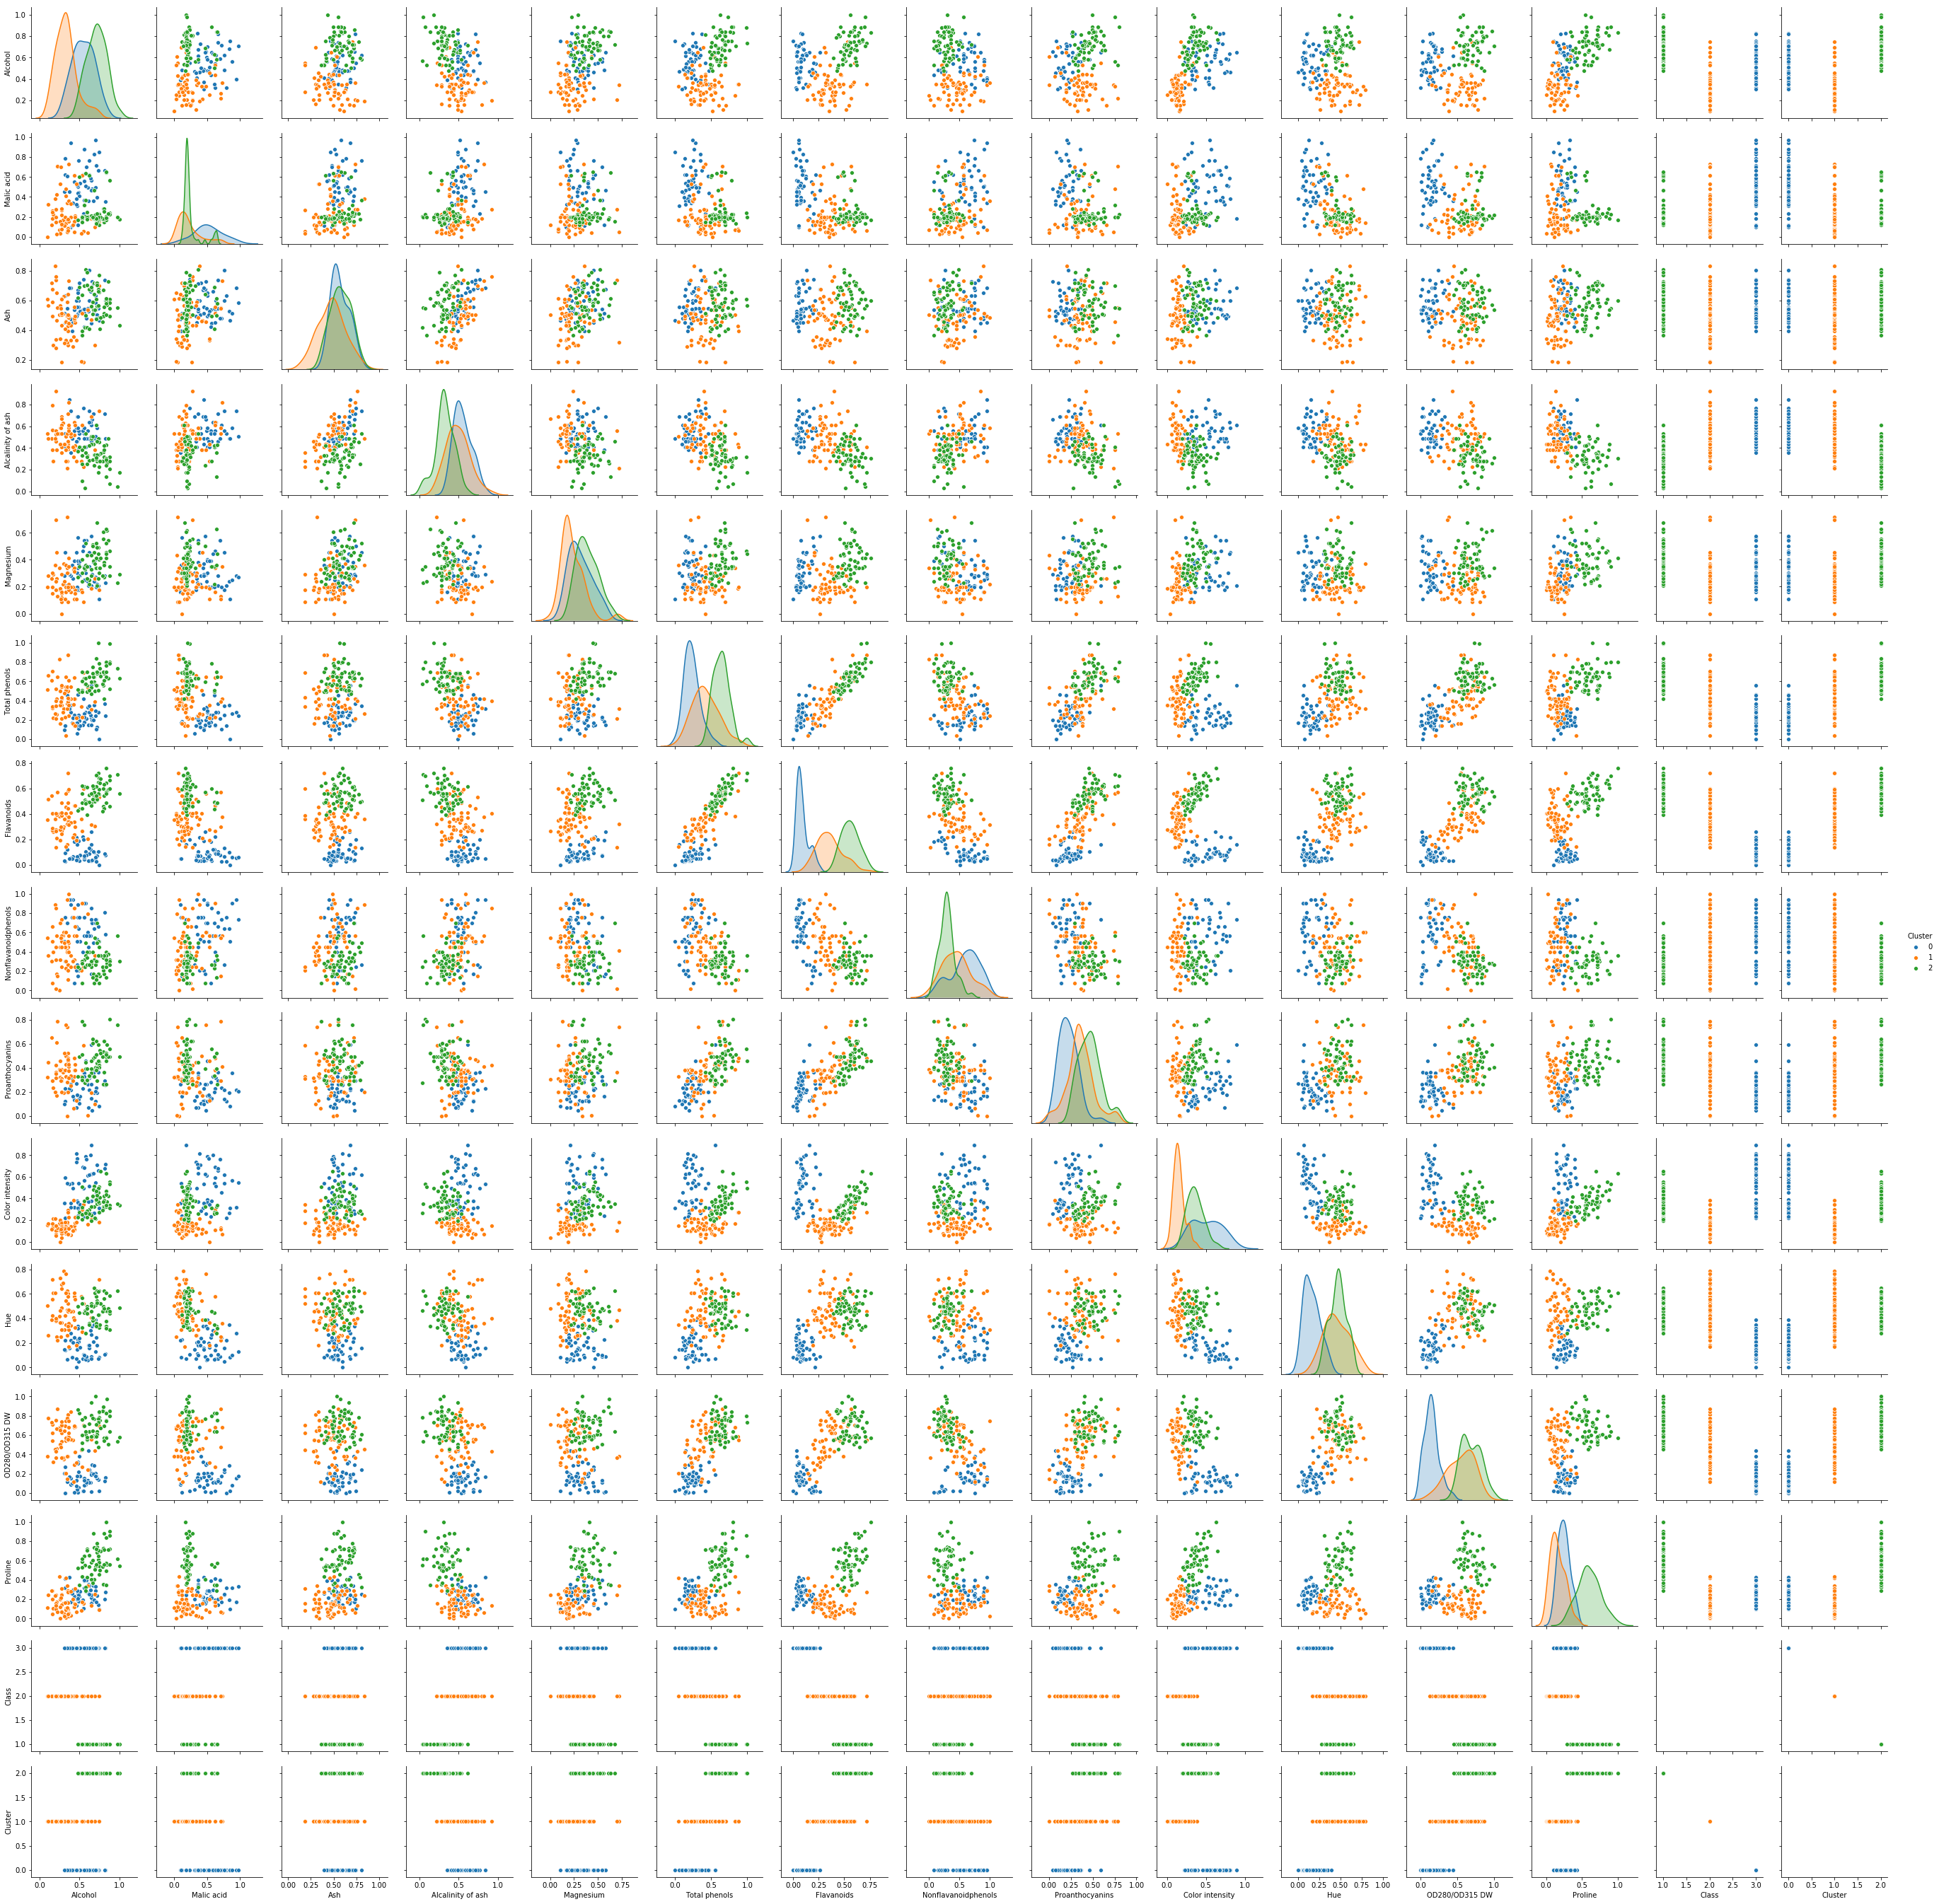

In [161]:
sns.pairplot(df_n, hue = 'Cluster')
plt.show()

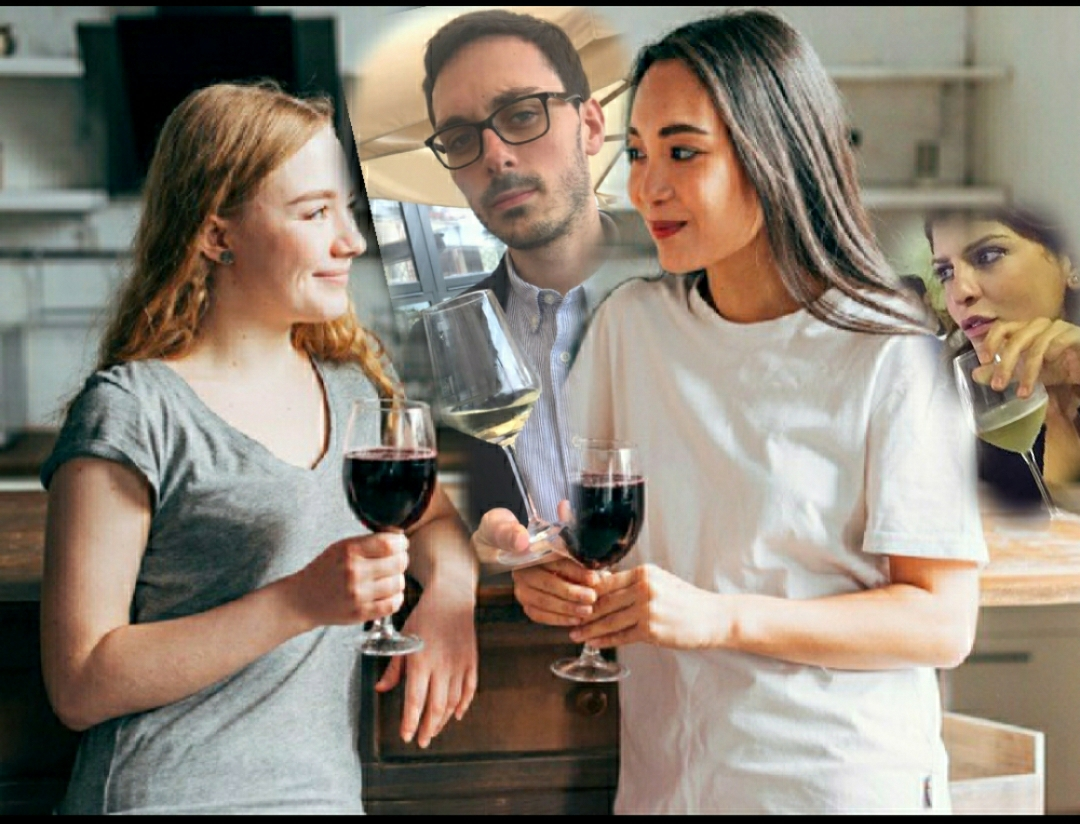

## 4 *K*-means can go wrong!

### *K*-means performances are significantly conditioned by its initialization. Here we provide an example shows that with wrong initialization, the cost of the solution produced by the k-means algorithm can be arbitrarily larger from the cost of optimal solution. We will do it comparing classic k-means with its 'upgrade' version, *k*-means++

### But ...

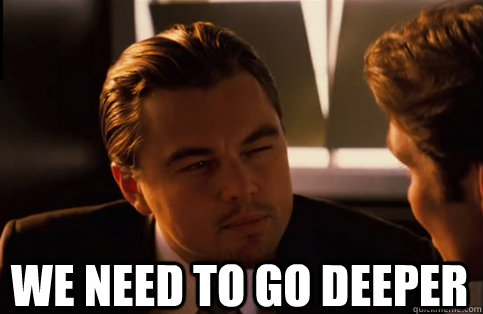

#### *K*-means initializes the cluster means by randomly generating *k* points in the data space. 

#### Each iteration of K-means consists of two steps:
  *  Cluster assignment
  *  Centroid update

#### Practically speaking, one can assume taht *k*-means has converged if the centroids do not change from one iteration to the next. For istance, we cant stop if $\sum_{i=1}^k \mid \mid \mu_i^t - \mu_i^{t-1} \mid \mid^2 \le \epsilon$ where $\epsilon >0$ is the convergence threshold, while $t$ denotes the current iteration and $\mu_i^t$ denotes the mean for the cluster $C_i$ in iteration $t$.
#### Note that k-means is highly sensitive to the initial *k* centroids, and and different clustering results can be obtained on a single dataset depending on the initial *k* centroids.
#### As we said *k*-means is highly sensitive to the initial *k* centroids. This problem can be mitigated by running ***k*-means++** which uses an heuristic to find centroid seeds for *k*-means clustering. It improves the running time and the quality of the final solution.
#### The algorithm consists of 4 steps:
 * Select an observation uniformly at random from the data set. The      choosen observation is the first centroid and it is denoted $c_1$.
 * compute distances from each obeservation to $c_1$. Denote the          distance between $c_1$ and the observation *m* as $d(x_m, c_1)$
 * Select the next centroid $c_2$ at random from x (data)with            probability:
 
     $\frac{d^2(x_m,c_1)}{\sum_{j=1}^n d^2(x_j,c_1)}$
 
 * To choose center *j*:
 
   a. Compute the distances from each observation to each centroid,         and assign each observation to its closest centroid.
   
   b. For *m*=1,..,*n* and p=1,...*j*-1, select centroid *j* at random       from  x with probability
   
     $\frac{d^2(x_m,c_p)} {\sum_{(h:x_h ∈ c_p} d^2(x_h, c_p)} $
     
     where $C_p$ is the set of all obseravations closest to centroid        $c_p$ and $x_m$ belongs to $C_p$. In this way, are selected each 
     subsequent center with a probability proportional to the distance
     from itself to the closest center that are already choosen.
 
#### The total times for the *k*-means++ method are smaller than *classic* *k*-means. The difference in these computation times follows from the mean number of repetitions required in the *k*-means method. Each repetition of the *k*-means method requires $O(kn)$ distance calculations. The larger the number of repetitions required, the larger the total compoutation time. So we can consider *k*-means++ $O(log k)$-competitive
 

## Now everything is more clear right? No? Ok! Let's take a look to a real data set where apply the algorithms

### We choose a dataframe which contains different  species of fish with different measure refers to weight, length, height and width

In [12]:
df=pd.read_csv('fish.csv', encoding = 'utf-8')
df.head(5)

species  weight  length1  length2  length3  height  width
0   Bream   242.0     23.2     25.4     30.0    38.4   13.4
1   Bream   290.0     24.0     26.3     31.2    40.0   13.8
2   Bream   340.0     23.9     26.5     31.1    39.8   15.1
3   Bream   363.0     26.3     29.0     33.5    38.0   13.3
4   Bream   430.0     26.5     29.0     34.0    36.6   15.1

### The dataset isn't so big but it's enough to demonstrate what we said before

In [6]:
df.shape

(85, 7)

### Distribution analysis of the variables:

In [7]:
df.describe().transpose()

count        mean         std   min    25%    50%    75%     max
weight    85.0  431.758824  380.933962   0.0  120.0  390.0  650.0  1650.0
length1   85.0   27.338824   11.289450   9.3   19.4   28.4   32.7    59.0
length2   85.0   29.557647   12.185045   9.8   21.0   30.7   36.0    63.4
length3   85.0   33.120000   13.197292  10.8   23.7   35.0   40.6    68.0
height    85.0   28.076471   10.351543  14.5   16.9   27.1   39.2    44.5
width     85.0   12.865882    2.117476   8.7   11.0   13.7   14.7    16.1

### Here we remove the label species :(

In [13]:
# remove the species from the DataFrame 
species = list(df['species'])
del df['species']

### And here a nice visualization :D

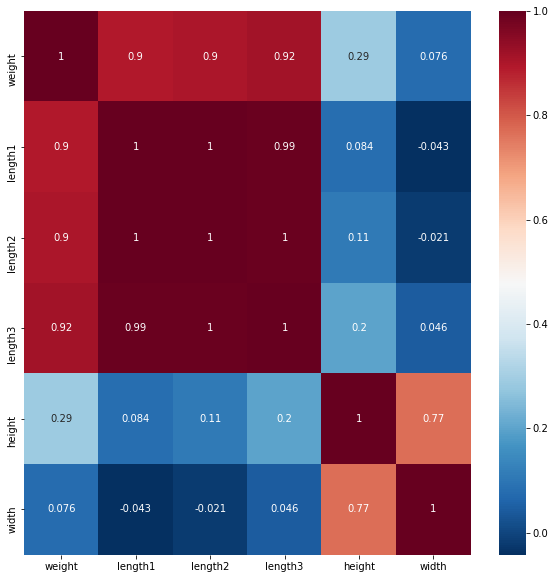

In [14]:
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap ="RdBu_r");

### Now it's time to standardize data!

In [15]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

### Create 2 components that are positive correlate with the features inside the dataframe across the use of the reduction dimensional algorithm : Analysis of Principal Components (PCA)   

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
X=principalComponents

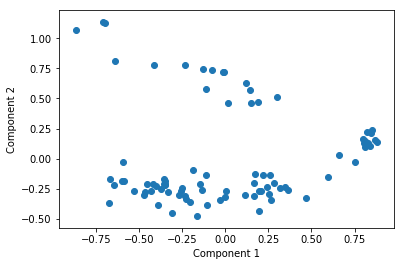

In [17]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [18]:
#List to append the time of execution 
time_r=[] #k-means 
time_plus=[] #k-means++

### Finally the *k*-means...

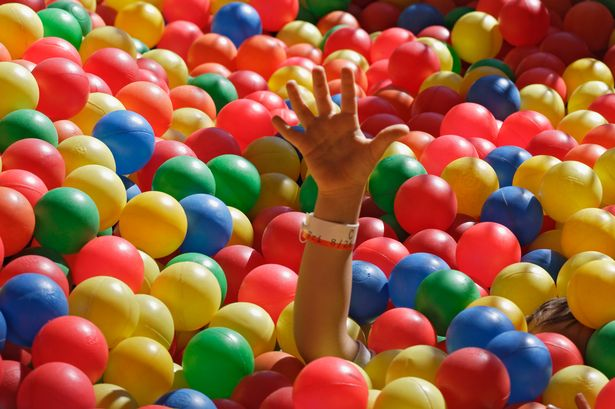

### As version of *k*-means it is used a one implemented by us for the previous task which initializes centroids randomly (very badly, trust us).
### We have executed the algorithm several times to store the execution times

The initial centroid with K-means are: 
 [[-0.40596388  0.2673365 ]
 [-0.31543777 -0.10813057]
 [ 0.00383412 -0.099731  ]]


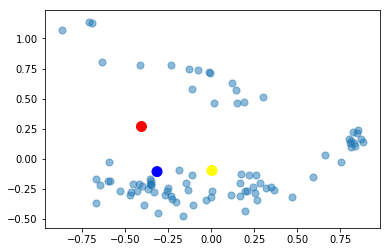

The final centroid with K-means are: 
 [[-0.17506774  0.72420844]
 [-0.33627885 -0.25862233]
 [ 0.49736997 -0.0884683 ]]


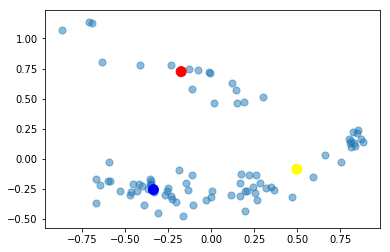

The time of execution is: 
 0.02396845817565918


In [23]:
import kmeans

for i in range(8):
    startino=time.time()
    centroids, cluster_assignments, iters, orig_centroids = kmeans.cluster(X, 3)
    
    end=time.time()
    
    time_r.append(end-startino)

print('The initial centroid with K-means are: \n',orig_centroids)    
plt.scatter(X[:,0], X[:,1], s=50, alpha=0.5,label='orig_centroids')
plt.scatter([orig_centroids[:, 0]], [orig_centroids[:, 1]], c=['red','blue','yellow'], s=100)
plt.show()


print('The final centroid with K-means are: \n',centroids)    

plt.scatter(X[:,0], X[:,1], s=50, alpha=0.5)
plt.scatter([centroids[:, 0]], [centroids[:, 1]], c=['red','blue','yellow'], s=100)
plt.show()
print('The time of execution is: \n',end-startino)
    

### While here we used the k-means ++ version from sklearn library and also in this case we have store the execution times

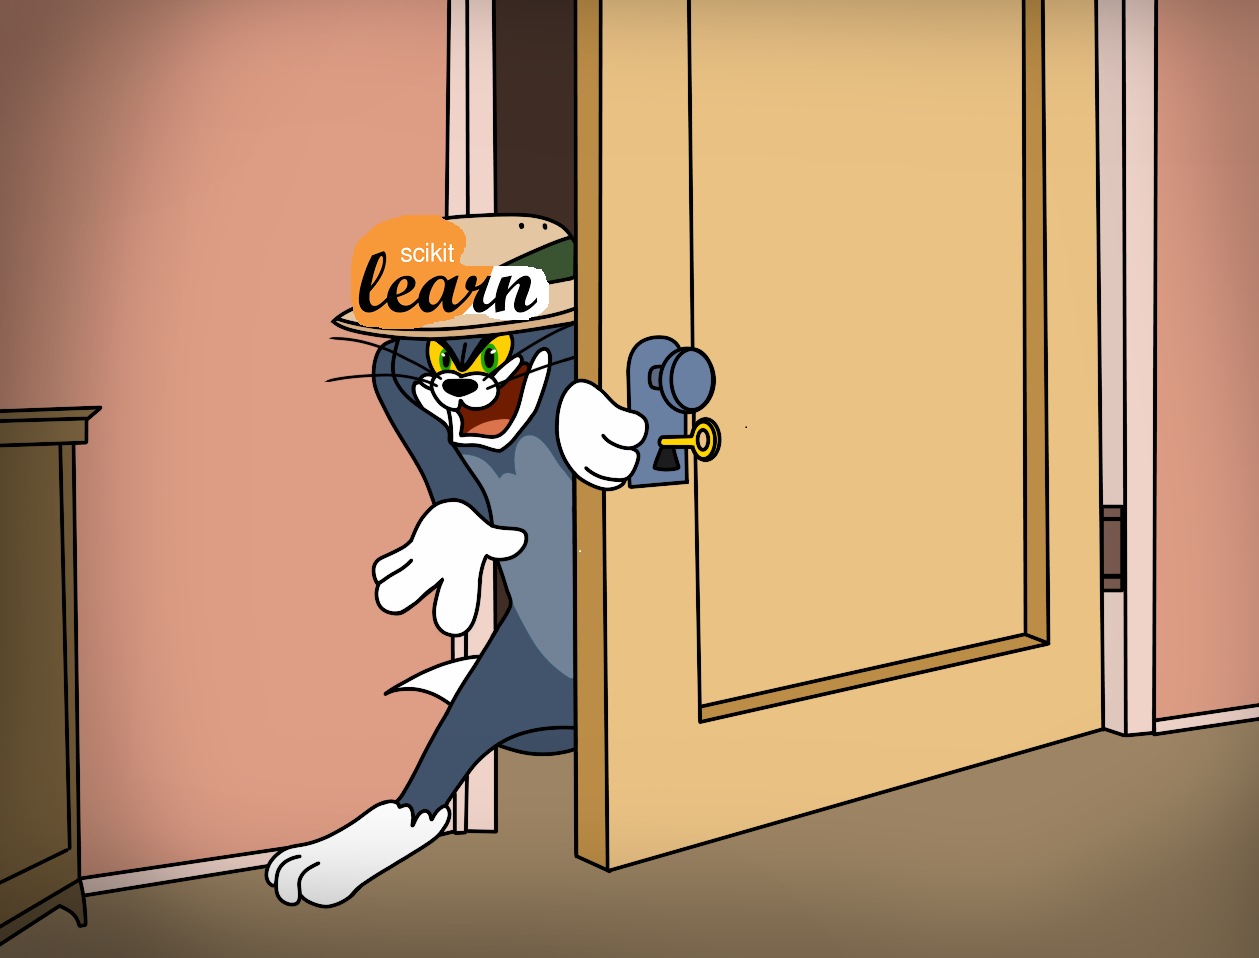

The centroid with K-means++ are: 
 [[ 0.45258191 -0.10789414]
 [-0.36504804 -0.25421008]
 [-0.17506774  0.72420844]]


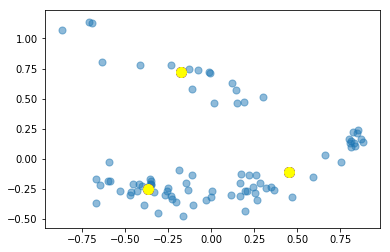

The time of execution is: 
 0.007989168167114258


In [27]:
for i in range(8):
    start_p=time.time()

    kmeans_plus = KMeans(n_clusters=3,init='k-means++').fit(X)
    centroids_plus = kmeans_plus.cluster_centers_
    end_p=time.time()
    time_plus.append(end_p-start_p)
    
print('The centroid with K-means++ are: \n',centroids_plus)

plt.scatter(X[:,0], X[:,1], s=50, alpha=0.5)
color=['red','blue','yellow']
for i in range(len(centroids_plus)):
    plt.scatter(centroids_plus[:, 0], centroids_plus[:, 1], c=color[i], s=100)
plt.show()

print('The time of execution is: \n',end_p-start_p)

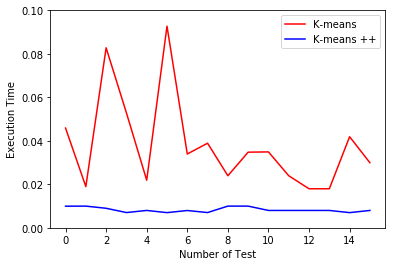

In [67]:
plt.plot(time_r,c='red', label='K-means')
plt.plot(time_plus,c='blue', label='K-means ++')
plt.ylim(bottom=0,top=0.10)
plt.xlabel('Number of Test')
plt.ylabel('Execution Time')
plt.legend(loc="upper right")
plt.show()

### As is shown above is clear that for every test *K*-means ++ is faster than classic *K*-means with a bad initialization